In [1]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt

def blur(img, kernel_size = 3):
	dummy = np.copy(img)
	h = np.eye(kernel_size) / kernel_size
	dummy = convolve2d(dummy, h, mode = 'valid')
	return dummy

def add_gaussian_noise(img, sigma):
	gauss = np.random.normal(0, sigma, np.shape(img))
	noisy_img = img + gauss
	noisy_img[noisy_img < 0] = 0
	noisy_img[noisy_img > 255] = 255
	return noisy_img

def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

def rgb2gray(rgb):
	return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [40]:
# Load image and convert it to gray scale
file_name = os.path.join('../blurry.png') 
# blurred_img = plt.imread(file_name)
blurred_img = rgb2gray(plt.imread(file_name))

In [35]:
blurred_img[..., 1].shape

(720, 1280)

In [43]:
# Apply Wiener Filter
kernel = gaussian_kernel(3)
filtered_img = wiener_filter(blurred_img, kernel, K = 10)
# filtered_img = np.array([wiener_filter(blurred_img[..., i], kernel, K = 10) for i in range(2, -1, -1)]).transpose((1, 2, 0))

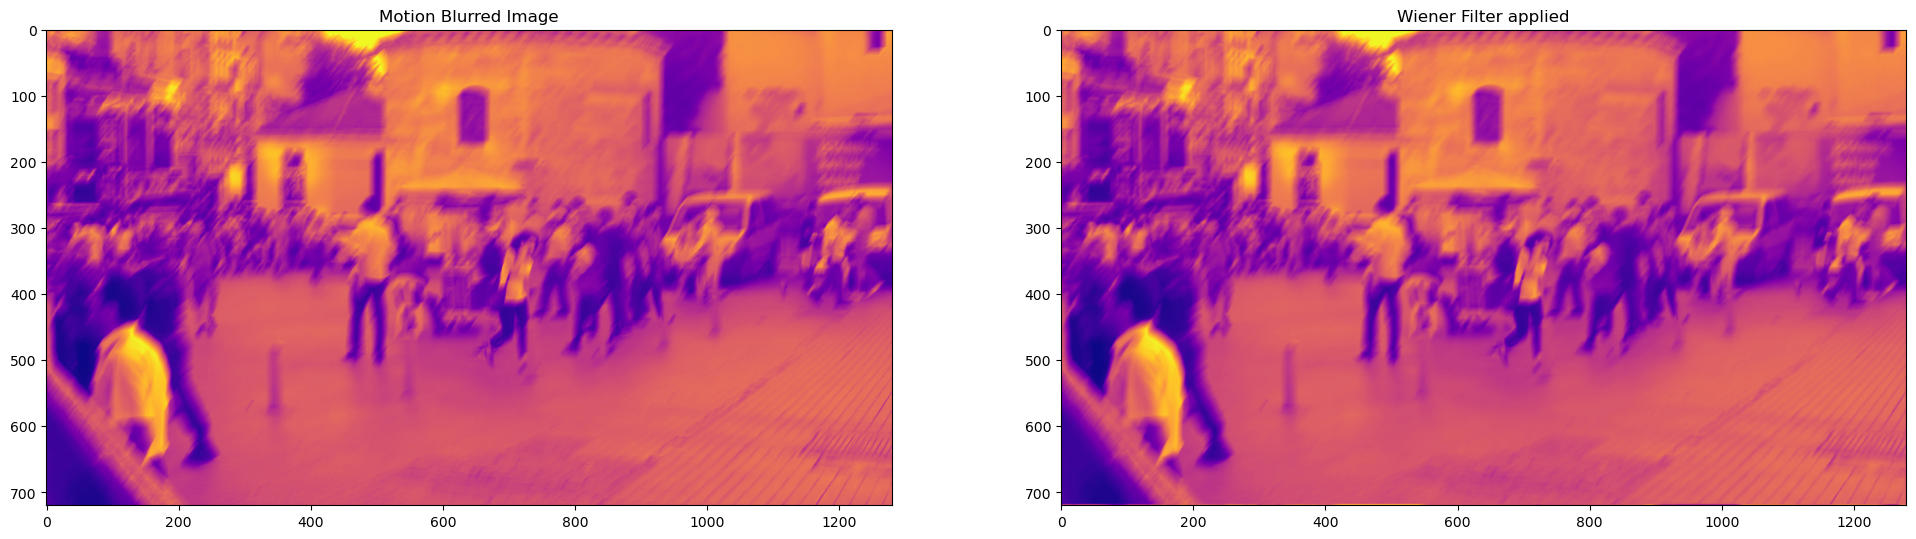

In [49]:
# Display results
display = [blurred_img, filtered_img]
label = ['Motion Blurred Image', 'Wiener Filter applied']

fig = plt.figure(figsize=(24, 20))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap='plasma')
    plt.title(label[i])

plt.show()